<a href="https://colab.research.google.com/github/IzanPereira/Modelo-de-previs-o-para-Hackathon/blob/main/Desafio_com_Python3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ETAPA 1: Extração e Análise Exploratória
import zipfile
import os

# Extrair arquivos ZIP
for zip_path in ["/content/hackathon_2025_templates (1).zip"]:
    with zipfile.ZipFile(zip_path, "r") as zip_ref:
        zip_ref.extractall("/content/")

# Abrir datasets

In [3]:
# DatasetPDV
ds_pdv = pq.ParquetDataset("/content/hackathon_2025_templates/part-00000-tid-2779033056155408584-f6316110-4c9a-4061-ae48-69b77c7c8c36-4-1-c000.snappy.parquet").read_pandas().to_pandas()
print(ds_pdv.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14419 entries, 0 to 14418
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pdv            14419 non-null  object
 1   premise        14419 non-null  object
 2   categoria_pdv  14419 non-null  object
 3   zipcode        14419 non-null  int32 
dtypes: int32(1), object(3)
memory usage: 394.4+ KB
None


In [4]:
# Dataset Transações diárias(vendas)
ds_transacoes = pq.ParquetDataset("/content/hackathon_2025_templates/part-00000-tid-5196563791502273604-c90d3a24-52f2-4955-b4ec-fb143aae74d8-4-1-c000.snappy.parquet").read_pandas().to_pandas()
print(ds_transacoes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6560698 entries, 0 to 6560697
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   internal_store_id    object 
 1   internal_product_id  object 
 2   distributor_id       object 
 3   transaction_date     object 
 4   reference_date       object 
 5   quantity             float64
 6   gross_value          float64
 7   net_value            float64
 8   gross_profit         float64
 9   discount             float64
 10  taxes                float64
dtypes: float64(6), object(5)
memory usage: 550.6+ MB
None


In [5]:
# Dataset de produtos
ds_produtos = pq.ParquetDataset("/content/hackathon_2025_templates/part-00000-tid-7173294866425216458-eae53fbf-d19e-4130-ba74-78f96b9675f1-4-1-c000.snappy.parquet").read_pandas().to_pandas()
print(ds_produtos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7092 entries, 0 to 7091
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   produto       7092 non-null   object
 1   categoria     7092 non-null   object
 2   descricao     7092 non-null   object
 3   tipos         7092 non-null   object
 4   label         5619 non-null   object
 5   subcategoria  7060 non-null   object
 6   marca         7092 non-null   object
 7   fabricante    7092 non-null   object
dtypes: object(8)
memory usage: 443.4+ KB
None


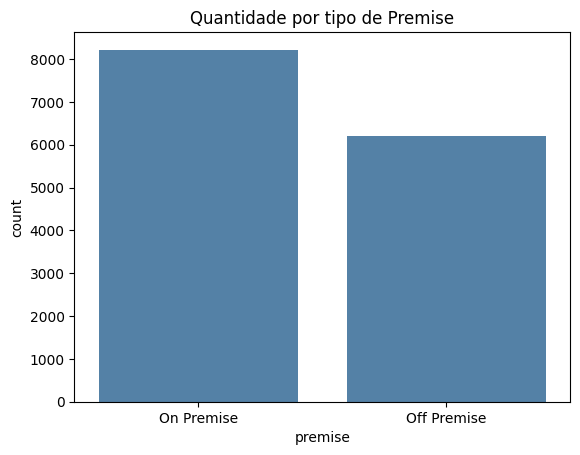

In [ ]:
sns.countplot(x="premise", data=ds_pdv, color="steelblue")
plt.title("Quantidade por tipo de Premise")
plt.show()

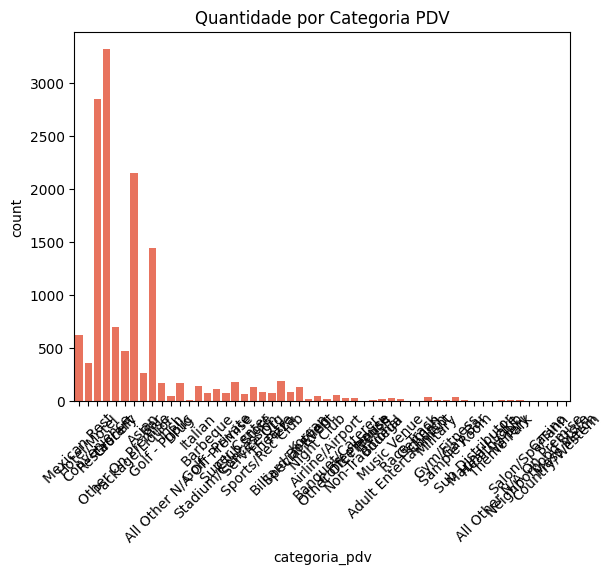

In [ ]:
sns.countplot(x="categoria_pdv", data=ds_pdv, color="tomato")
plt.title("Quantidade por Categoria PDV")
plt.xticks(rotation=45)
plt.show()

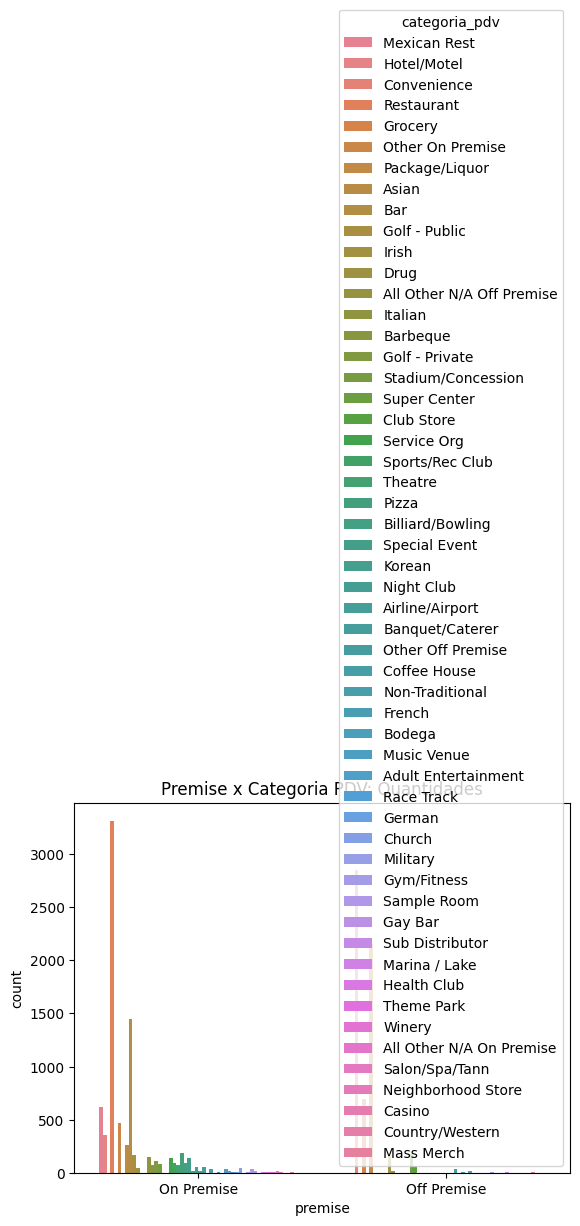

In [ ]:
sns.countplot(x="premise", data=ds_pdv, hue="categoria_pdv", dodge=True)
plt.title("Premise x Categoria PDV: Quantidades")
plt.show()

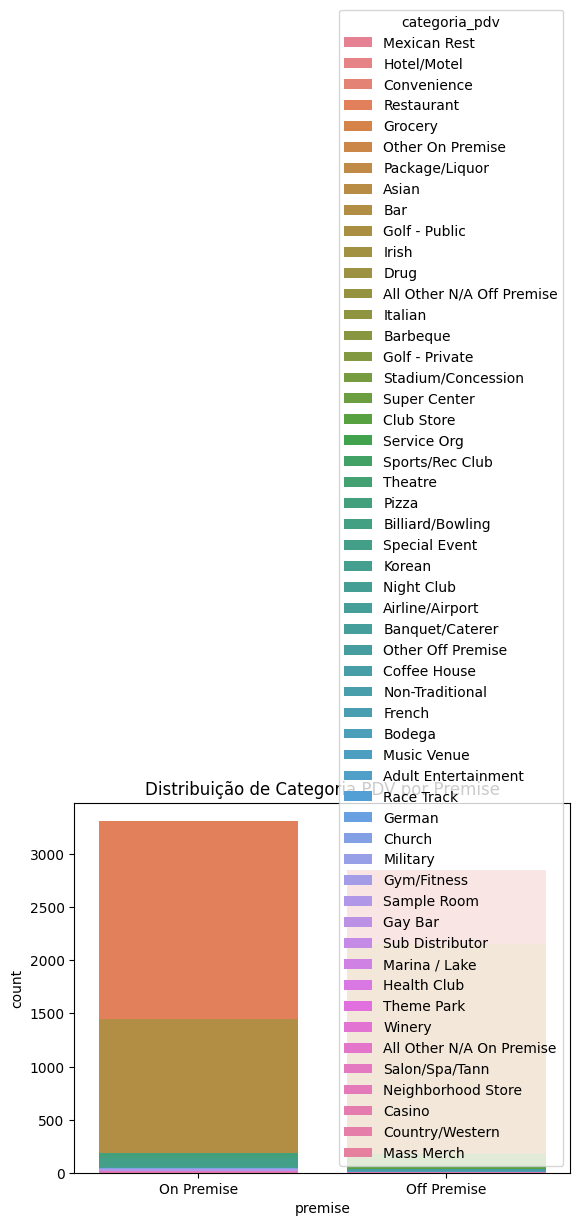

In [ ]:
sns.countplot(x="premise", data=ds_pdv, hue="categoria_pdv", dodge=False)
plt.title("Distribuição de Categoria PDV por Premise")
plt.show()

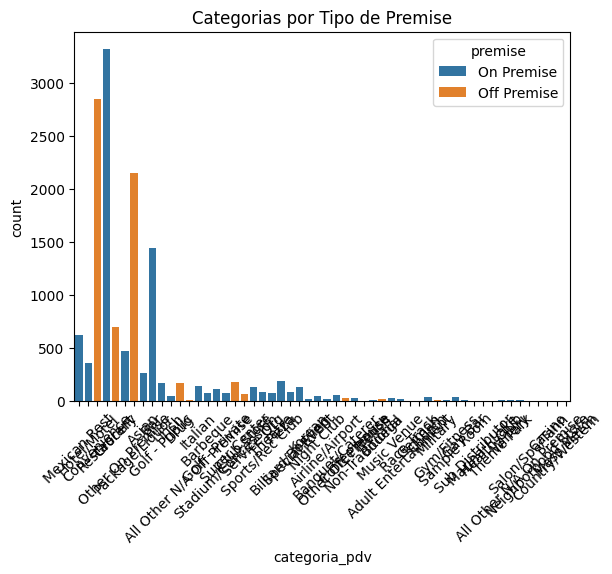

In [ ]:
sns.countplot(x="categoria_pdv", data=ds_pdv, hue="premise")
plt.title("Categorias por Tipo de Premise")
plt.xticks(rotation=45)
plt.show()

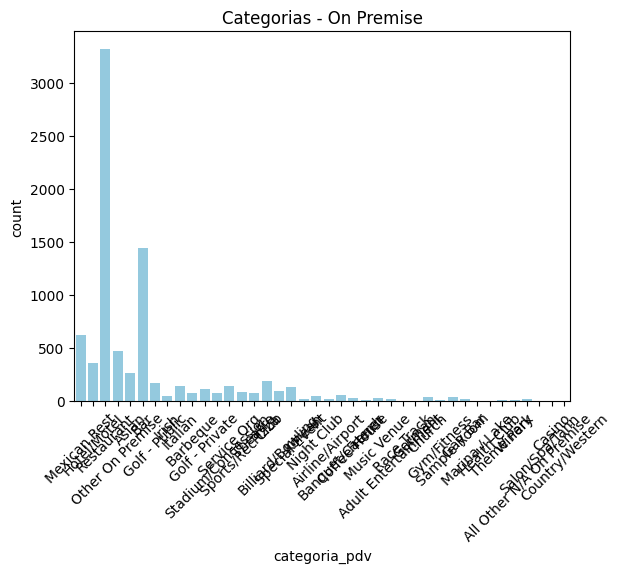

In [ ]:
# Filtragem e coleta
ds_on = ds_pdv.query('premise == "On Premise"')
sns.countplot(x="categoria_pdv", data=ds_on, color="skyblue")
plt.title("Categorias - On Premise")
plt.xticks(rotation=45)
plt.show()

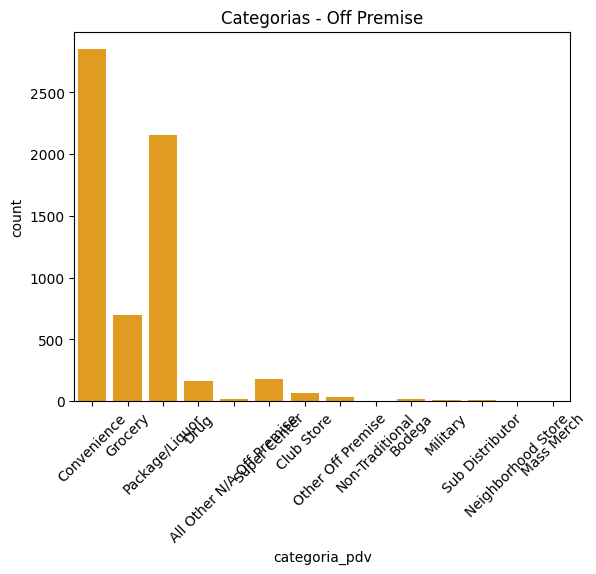

In [ ]:
ds_off = ds_pdv.query('premise == "Off Premise"')
sns.countplot(x="categoria_pdv", data=ds_off, color="orange")
plt.title("Categorias - Off Premise")
plt.xticks(rotation=45)
plt.show()

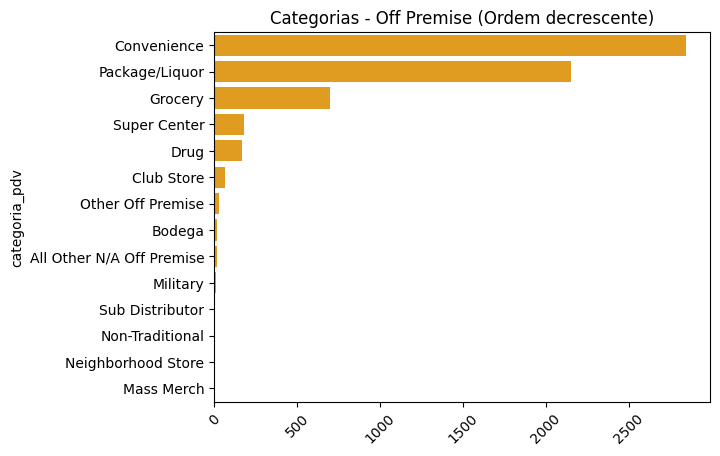

In [ ]:
top_categoria = ds_off['categoria_pdv'].value_counts().sort_values(ascending=False)
sns.barplot(x=top_categoria.values, y=top_categoria.index, color="orange")
plt.title("Categorias - Off Premise (Ordem decrescente)")
plt.xticks(rotation=45)
plt.show()

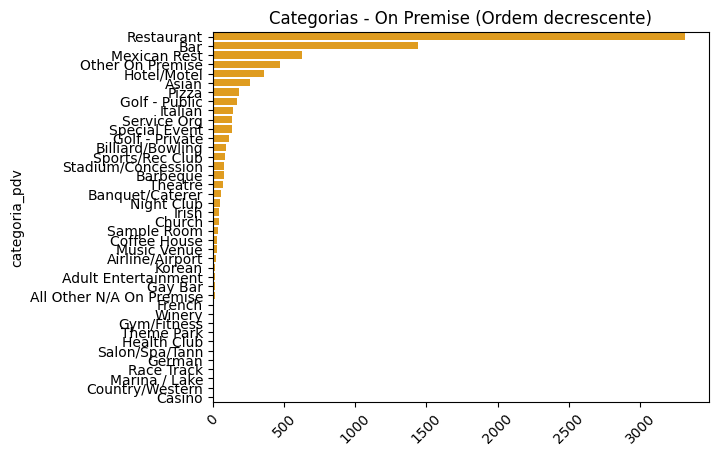

In [ ]:
top_categoria_on = ds_on['categoria_pdv'].value_counts().sort_values(ascending=False)
sns.barplot(x=top_categoria_on.values, y=top_categoria_on.index, color="orange")
plt.title("Categorias - On Premise (Ordem decrescente)")
plt.xticks(rotation=45)
plt.show()

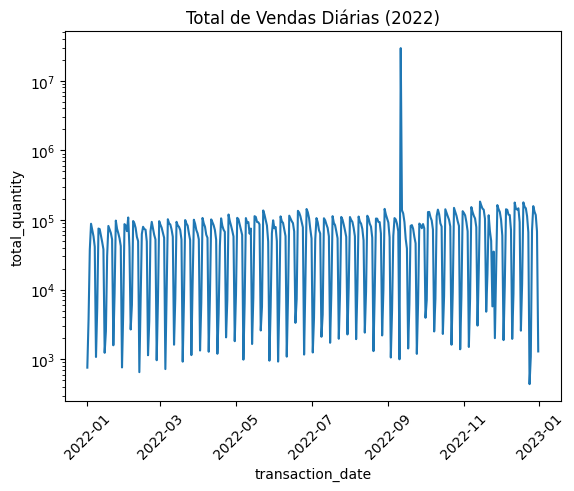

In [ ]:
vendas_diarias = ds_transacoes.groupby("transaction_date").agg(total_quantity=("quantity", "sum")).reset_index()
sns.lineplot(x="transaction_date", y="total_quantity", data=vendas_diarias)
plt.title("Total de Vendas Diárias (2022)")
plt.yscale("log")
plt.xticks(rotation=45)
plt.show()

In [ ]:
import calendar
vendas_diarias["dia_da_semana"] = pd.to_datetime(vendas_diarias["transaction_date"]).dt.weekday + 1
df_finaisdesemana = vendas_diarias[vendas_diarias["dia_da_semana"].isin([6, 7])]


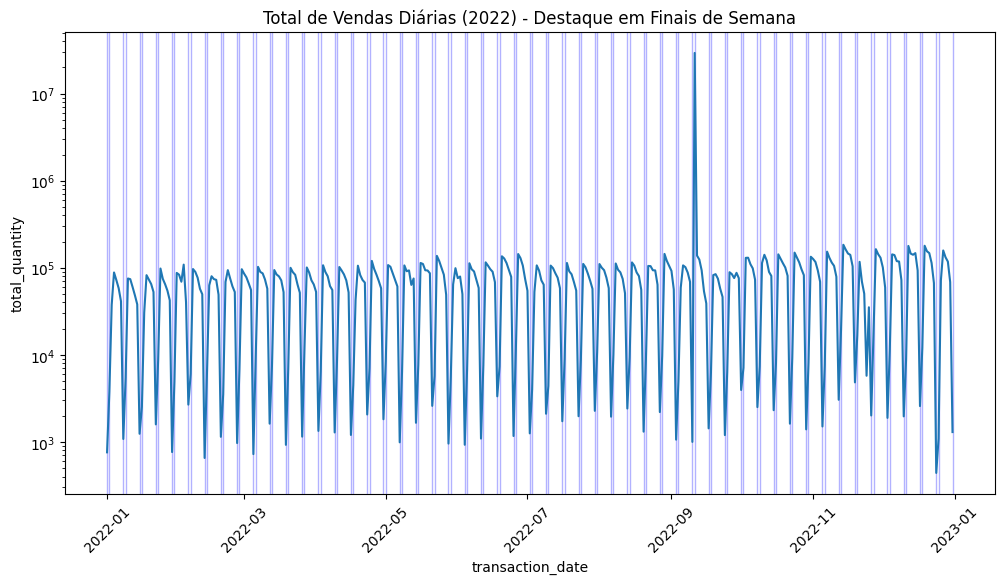

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x="transaction_date", y="total_quantity", data=vendas_diarias)
for date in df_finaisdesemana["transaction_date"]:
    plt.axvspan(date, date, color="blue", alpha=0.3)
plt.yscale("log")
plt.xticks(rotation=45)
plt.title("Total de Vendas Diárias (2022) - Destaque em Finais de Semana")
plt.show()

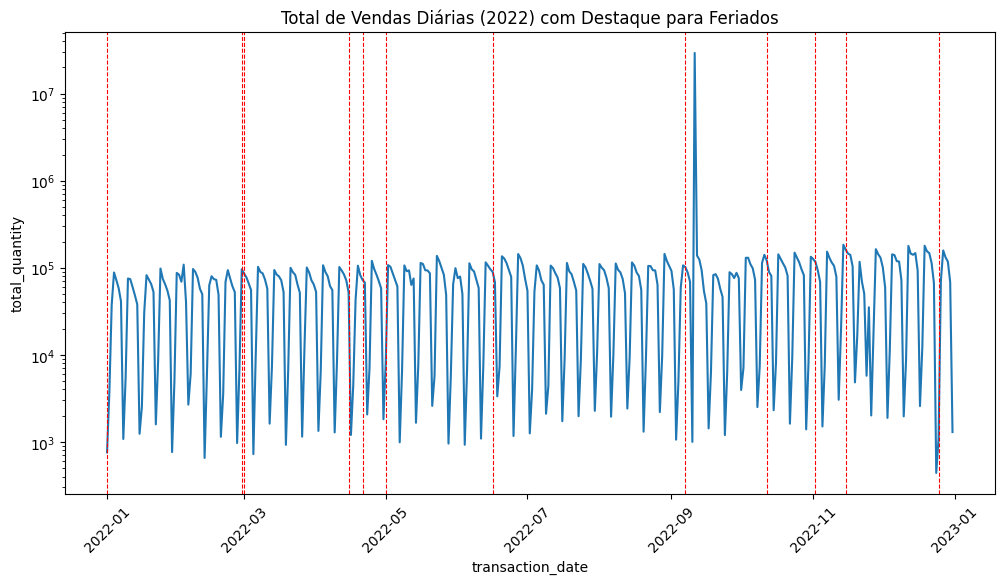

In [ ]:
# Feriados
feriados_2022 = pd.to_datetime([
  "2022-01-01","2022-02-28","2022-03-01","2022-04-15","2022-04-21","2022-05-01","2022-06-16",
  "2022-09-07","2022-10-12","2022-11-02","2022-11-15","2022-12-25"
])
plt.figure(figsize=(12,6))
sns.lineplot(x="transaction_date", y="total_quantity", data=vendas_diarias)
for h in feriados_2022:
    plt.axvline(x=h, color='red', linestyle='dashed', linewidth=0.8)
plt.yscale("log")
plt.xticks(rotation=45)
plt.title("Total de Vendas Diárias (2022) com Destaque para Feriados")
plt.show()

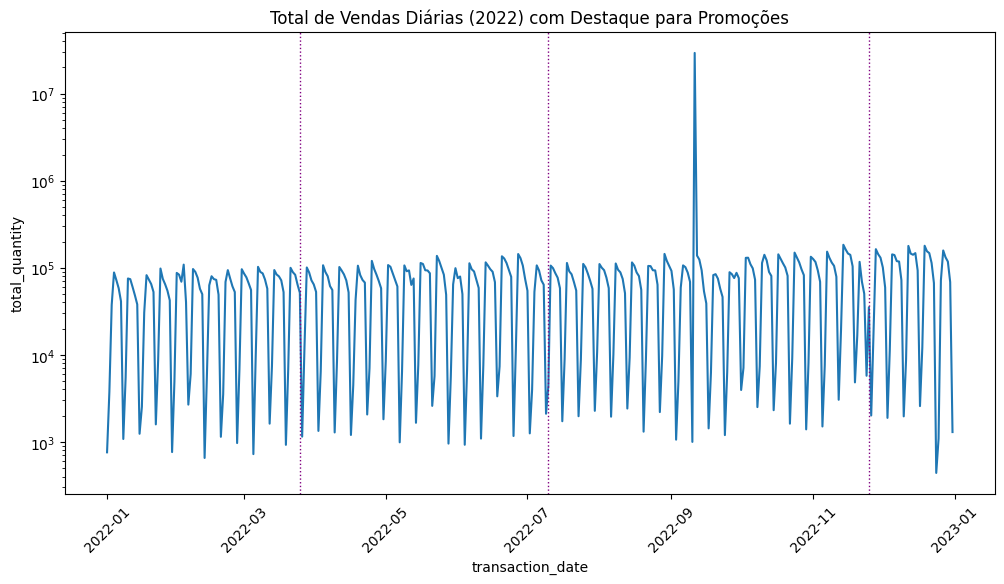

In [ ]:
# Promoções
datas_promocoes_2022 = pd.to_datetime(["2022-03-25", "2022-07-10", "2022-11-25"])
plt.figure(figsize=(12,6))
sns.lineplot(x="transaction_date", y="total_quantity", data=vendas_diarias)
for h in datas_promocoes_2022:
    plt.axvline(x=h, color='purple', linestyle='dotted', linewidth=1)
plt.yscale("log")
plt.xticks(rotation=45)
plt.title("Total de Vendas Diárias (2022) com Destaque para Promoções")
plt.show()

In [ ]:
# Hipótese dos eventos
promocoes_2022 = datas_promocoes_2022
df_eventos = vendas_diarias.copy()
df_eventos["is_holiday"] = df_eventos["transaction_date"].isin(feriados_2022).map({True: "Sim", False: "Não"})
df_eventos["is_promotion"] = df_eventos["transaction_date"].isin(promocoes_2022).map({True: "Sim", False: "Não"})
df_eventos["is_weekend"] = df_eventos["dia_da_semana"].isin([6,7]).map({True: "Sim", False: "Não"})

analise_eventos = df_eventos.groupby(["is_weekend","is_holiday","is_promotion"]).agg(
    media_vendas=("total_quantity","mean"),
    n_dias=("transaction_date","nunique")
).reset_index()
print(analise_eventos)

  is_weekend is_holiday is_promotion   media_vendas  n_dias
0        Não        Não          Não   90137.562929     260
1        Sim        Não          Não  284531.101989     105


In [ ]:
# Sampling, filtrar datas e amostrar datas
ds_filtrado = ds_transacoes[
    (pd.to_datetime(ds_transacoes["transaction_date"]) >= pd.to_datetime("2022-01-01")) &
    (pd.to_datetime(ds_transacoes["transaction_date"]) <= pd.to_datetime("2022-12-31"))
]
df_vendas_amostra = ds_filtrado.sample(frac=1)

pdvs_amostra = df_vendas_amostra["internal_store_id"].unique()
df_pdv_amostra = ds_pdv[ds_pdv["pdv"].isin(pdvs_amostra)].sample(frac=1)

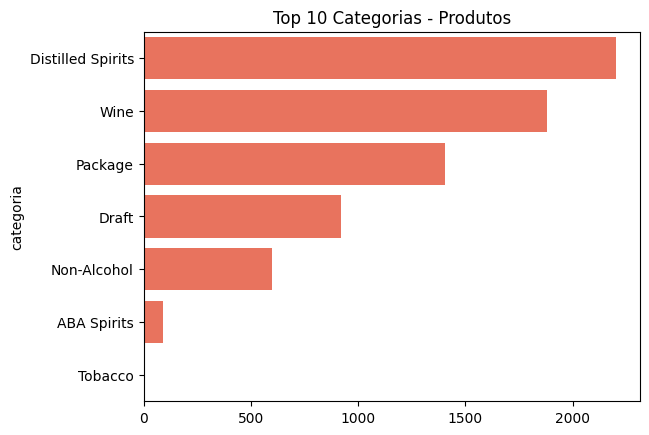

In [ ]:
# Análises visuais
top_categorias = ds_produtos["categoria"].value_counts().head(10)
sns.barplot(x=top_categorias.values, y=top_categorias.index, color="tomato")
plt.title("Top 10 Categorias - Produtos")
plt.show()

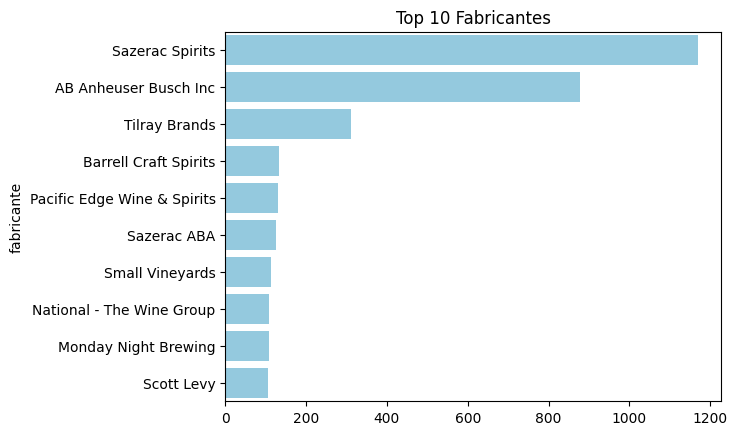

In [ ]:
top_fabricantes = ds_produtos["fabricante"].value_counts().head(10)
sns.barplot(x=top_fabricantes.values, y=top_fabricantes.index, color="skyblue")
plt.title("Top 10 Fabricantes")
plt.show()

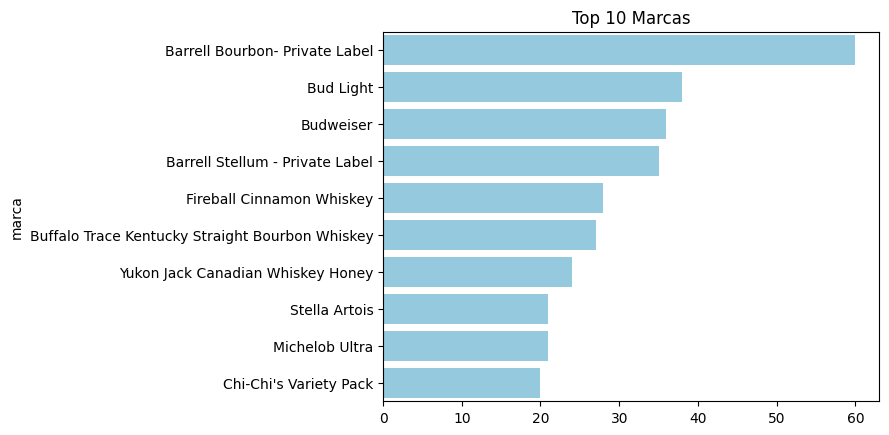

In [ ]:
top_marcas = ds_produtos["marca"].value_counts().head(10)
sns.barplot(x=top_marcas.values, y=top_marcas.index, color="skyblue")
plt.title("Top 10 Marcas")
plt.show()

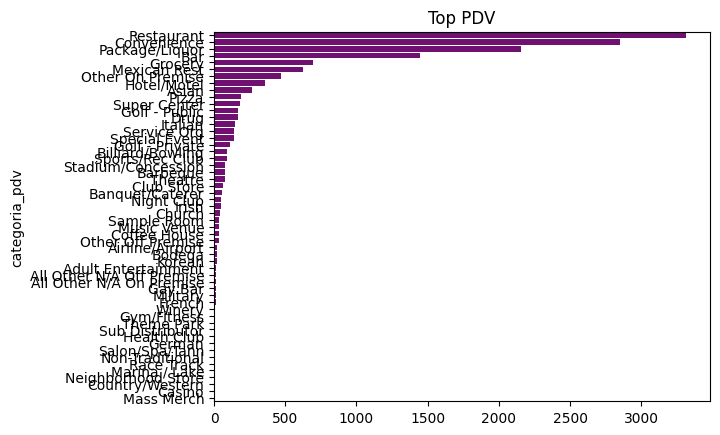

In [ ]:
top_pdv = ds_pdv["categoria_pdv"].value_counts()
sns.barplot(x=top_pdv.values, y=top_pdv.index, color="purple")
plt.title("Top PDV")
plt.show()

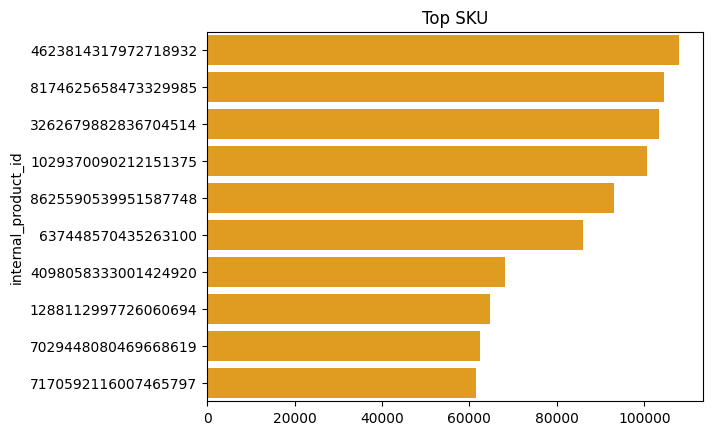

In [ ]:
top_sku = ds_transacoes["internal_product_id"].value_counts().head(10)
sns.barplot(x=top_sku.values, y=top_sku.index, color="orange")
plt.title("Top SKU")
plt.show()

# Exploração visual final (exemplo)

In [6]:
produtos_unique = ds_produtos.groupby("produto").agg(
    categoria=("categoria","first"),
    descricao=("descricao","first"),
    tipos=("tipos","first"),
    label=("label","first"),
    subcategoria=("subcategoria","first"),
    marca=("marca","first"),
    fabricante=("fabricante","first")
).reset_index()

In [9]:
df_vendas_enriquecida = ds_transacoes.merge(produtos_unique, left_on="internal_product_id", right_on="produto", how="left")
df_vendas_final = df_vendas_enriquecida.merge(ds_pdv, left_on="internal_store_id", right_on="pdv", how="left")

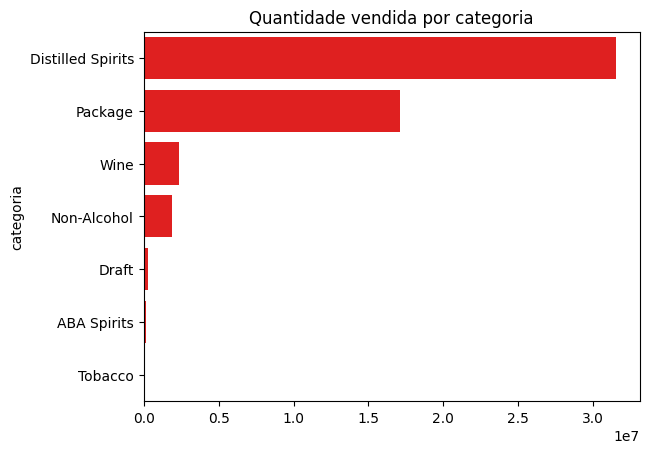

In [ ]:

top_categoria_final = df_vendas_final.groupby("categoria")["quantity"].sum().sort_values(ascending=False)
sns.barplot(x=top_categoria_final.values, y=top_categoria_final.index, color="red")
plt.title("Quantidade vendida por categoria")
plt.show()

# ETAPA 2: Modelagem XGBoost

In [11]:
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [12]:
df_semanal = df_vendas_final.groupby(["internal_store_id", "internal_product_id", pd.to_datetime(df_vendas_final["transaction_date"]).dt.isocalendar().year, pd.to_datetime(df_vendas_final["transaction_date"]).dt.isocalendar().week]).agg(
    qntd_vendida=("quantity", "sum"),
    desconto_medio=("discount", "mean"),
    lucro_medio=("gross_profit", "mean")
).reset_index()
df_semanal.columns = ["internal_store_id", "internal_product_id", "ano", "semana_ano", "qntd_vendida", "desconto_medio", "lucro_medio"]


In [ ]:
df_semanal['lag1'] = df_semanal.groupby(['internal_store_id', 'internal_product_id'])['qntd_vendida'].shift(1)
df_semanal['lag2'] = df_semanal.groupby(['internal_store_id', 'internal_product_id'])['qntd_vendida'].shift(2)

# Calcular a média móvel separadamente e mesclá-la de volta
rolling_mean_3 = df_semanal.groupby(['internal_store_id', 'internal_product_id'])['qntd_vendida'].rolling(window=3).mean()

# A operação de rolling cria um MultiIndex (store_id, product_id, original_index).
# Precisamos alinhar isso com o índice original de df_semanal antes de atribuir.
# A forma mais simples geralmente é redefinir o índice do resultado do rolling e fazer um merge.
rolling_mean_3 = rolling_mean_3.reset_index(level=[0, 1], drop=True)

# Atribua a média móvel de volta ao df_semanal; o pandas irá alinhar baseado no índice
df_semanal['media_movel3'] = rolling_mean_3

In [15]:
# Removendo Outlier
Q1 = df_semanal['qntd_vendida'].quantile(0.25)
Q3 = df_semanal['qntd_vendida'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_semanal_filtered = df_semanal[(df_semanal['qntd_vendida'] >= lower_bound) & (df_semanal['qntd_vendida'] <= upper_bound)].copy()

# Padronizando
features_to_standardize = ["desconto_medio", "lucro_medio", "lag1", "lag2", "media_movel3"]
scaler = StandardScaler()
df_semanal_filtered[features_to_standardize] = scaler.fit_transform(df_semanal_filtered[features_to_standardize])

print("Data after outlier removal and standardization:")
print(df_semanal_filtered.head())
print(df_semanal_filtered.info())

Data after outlier removal and standardization:
     internal_store_id  internal_product_id   ano  semana_ano  qntd_vendida  \
0  1000237487041964405  1837429607327399565  2022           6           1.0   
1  1000237487041964405  1837429607327399565  2022           7           2.0   
2  1000237487041964405  1837429607327399565  2022          21           1.0   
3  1000237487041964405  1837429607327399565  2022          25           2.0   
4  1000237487041964405  1837429607327399565  2022          28           2.0   

   desconto_medio  lucro_medio      lag1      lag2  media_movel3  
0       -0.134283    -0.029673       NaN       NaN           NaN  
1       -0.134283     0.024999 -0.137635       NaN           NaN  
2       -0.134283    -0.022244 -0.069990 -0.123004     -0.208450  
3       -0.134283     0.039857 -0.137635 -0.059422     -0.150463  
4       -0.134283     0.039857 -0.069990 -0.123004     -0.150463  
<class 'pandas.core.frame.DataFrame'>
Index: 5406386 entries, 0 to 6247300


In [17]:
print(df_semanal.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6247301 entries, 0 to 6247300
Data columns (total 10 columns):
 #   Column               Dtype  
---  ------               -----  
 0   internal_store_id    object 
 1   internal_product_id  object 
 2   ano                  UInt32 
 3   semana_ano           UInt32 
 4   qntd_vendida         float64
 5   desconto_medio       float64
 6   lucro_medio          float64
 7   lag1                 float64
 8   lag2                 float64
 9   media_movel3         float64
dtypes: UInt32(2), float64(6), object(2)
memory usage: 440.9+ MB
None


# SPLIT treino/teste

In [18]:
# Filtrando e padronizando as datas
train_data1 = df_semanal_filtered[(df_semanal_filtered["ano"] == 2022) & (df_semanal_filtered["semana_ano"] <= 48)].copy()
test_data1 = df_semanal_filtered[(df_semanal_filtered["ano"] == 2022) & (df_semanal_filtered["semana_ano"] > 48)].copy()

featnames = ["desconto_medio", "lucro_medio", "lag1", "lag2", "media_movel3"]
y_train = train_data1["qntd_vendida"]
X_train = train_data1[featnames].fillna(0)
y_test = test_data1["qntd_vendida"]
X_test = test_data1[featnames].fillna(0)

In [19]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test)
params = {"objective": "reg:squarederror", "eta": 0.1, "max_depth": 6}
xgb_model = xgb.train(params, dtrain, num_boost_round=100)
y_pred = xgb_model.predict(dtest)


In [20]:
from sklearn.metrics import mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae:.2f}, R2: {r2:.2f}, RMSE: {rmse:.2f}")

mape = (abs(y_test - y_pred) / y_test.clip(lower=1)).mean() * 100
smape = (2 * abs(y_pred - y_test) / (abs(y_test) + abs(y_pred) + 1e-8)).mean() * 100
print(f"MAPE: {mape:.2f}%")
print(f"sMAPE: {smape:.2f}%")

MAE: 0.22, R2: 0.93, RMSE: 0.48
MAPE: 10.38%
sMAPE: 11.86%


In [21]:
# Submissão
df_submit = test_data1[["internal_store_id","internal_product_id","ano","semana_ano"]].copy()
df_submit["quantidade"] = y_pred
df_submit.rename(columns={"internal_store_id":"pdv", "internal_product_id":"produto", "semana_ano":"semana"}, inplace=True)
df_submit["quantidade"] = df_submit["quantidade"].clip(lower=0).round()
df_submit["semana"] = df_submit["semana"].astype(int)
df_submit = df_submit[["semana","pdv","produto","quantidade"]]
print(df_submit.head())
df_submit.to_csv("/content/previsao_por_semana_pdv_produto.csv", index=False)

     semana                  pdv              produto  quantidade
93       49  1000285336744471896  3496441975053481303         1.0
125      50  1001371918471115422  1009179103632945474         2.0
126      51  1001371918471115422  1009179103632945474         2.0
127      52  1001371918471115422  1009179103632945474         2.0
231      50  1001371918471115422  1454838625590783593         5.0
